In [4]:
import graphlab
import numpy as np
import matplotlib.pyplot as plt

In [7]:
sales = graphlab.SFrame('kc_house_data.gl/')

In [15]:
def polynomial_sframe(features,deg):
    poly_sframe = graphlab.SFrame()
    for i in range (1,deg+1):
        poly_sframe['power'+str(i)]= features ** i
    return poly_sframe

In [24]:
sales = sales.sort(['sqft_living','price'])
data = polynomial_sframe(sales['sqft_living'],15)
data['price'] = sales['price']

In [25]:
model = graphlab.linear_regression.create(data , target='price' , l2_penalty = 1e-5 , l1_penalty=0., validation_set=None , verbose=False)

In [26]:
model.coefficients

name,index,value,stderr
(intercept),None,167924.854552,nan
power1,None,103.090960935,nan
power2,None,0.134604539736,nan
power3,None,-0.000129071357153,nan
power4,None,5.18928934082e-08,nan
power5,None,-7.77169258564e-12,nan
power6,None,1.71144799293e-16,nan
power7,None,4.51177980576e-20,nan
power8,None,-4.78839847247e-25,nan
power9,None,-2.33343497452e-28,2.70591702281e-25


In [28]:
model1 = graphlab.linear_regression.create(data , target='price' , l2_penalty = 0. , l1_penalty=0., validation_set=None , verbose=False)

In [29]:
model1.coefficients

name,index,value,stderr
(intercept),None,5092206.0815,nan
power1,None,-25656.1597371,nan
power2,None,54.6517797301,nan
power3,None,-0.0622444264216,nan
power4,None,4.2650393341e-05,nan
power5,None,-1.85149561135e-08,nan
power6,None,5.16428148524e-12,nan
power7,None,-8.97106746315e-16,nan
power8,None,8.35210622337e-20,nan
power9,None,-6.70967692322e-25,2.71331005875e-25


In [32]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

In [37]:
set11 = polynomial_sframe(set_1['sqft_living'],15)
set11['price'] = set_1['price']

set22 = polynomial_sframe(set_2['sqft_living'],15)
set22['price'] = set_2['price']

set33 = polynomial_sframe(set_3['sqft_living'],15)
set33['price'] = set_3['price']

set44 = polynomial_sframe(set_4['sqft_living'],15)
set44['price'] = set_4['price']

In [38]:
set1_model = graphlab.linear_regression.create(set11 , target='price' , l2_penalty = 1e-5 , l1_penalty=0., validation_set=None , verbose=False)
set2_model = graphlab.linear_regression.create(set22 , target='price' , l2_penalty = 1e-5 , l1_penalty=0., validation_set=None , verbose=False)
set3_model = graphlab.linear_regression.create(set33 , target='price' , l2_penalty = 1e-5 , l1_penalty=0., validation_set=None , verbose=False)
set4_model = graphlab.linear_regression.create(set44 , target='price' , l2_penalty = 1e-5 , l1_penalty=0., validation_set=None , verbose=False)

In [39]:
set1_model.coefficients

name,index,value,stderr
(intercept),None,9306.46228122,732892.390865
power1,None,585.865818914,2901.67812256
power2,None,-0.397305891338,4.45935382966
power3,None,0.000141470898797,0.00313910330478
power4,None,-1.52945987174e-08,nan
power5,None,-3.79756307692e-13,nan
power6,None,5.97481674547e-17,nan
power7,None,1.06888509045e-20,nan
power8,None,1.59344049857e-25,nan
power9,None,-6.92834914942e-29,6.15261571708e-25


In [61]:
set2_model.coefficients

name,index,value,stderr
(intercept),None,-25115.9069826,808475.794428
power1,None,783.493809363,2861.25594063
power2,None,-0.767759315432,nan
power3,None,0.00043876637795,nan
power4,None,-1.15169170173e-07,nan
power5,None,6.84281428486e-12,nan
power6,None,2.51195181419e-15,nan
power7,None,-2.06440609958e-19,nan
power8,None,-4.59673021934e-23,nan
power9,None,-2.71277315297e-29,2.14802676748e-23


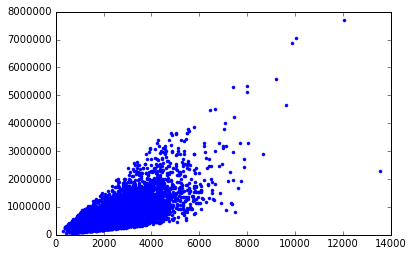

In [56]:
%matplotlib inline
x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
ypred=set1_model.predict(x_pred)
plt.plot(sales['sqft_living'],sales['price'],'.',x_pred['X1'],ypred,'-')

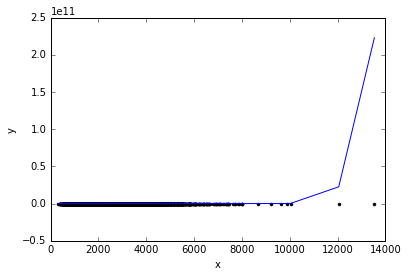

In [150]:
def plot_data(data):    
    plt.plot(data['power1'],data['price'],'k.' , data['power1'], set2_model.predict(data),'-')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

In [64]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1
    
    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(x_pred)
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

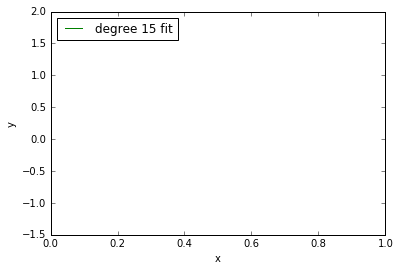

In [65]:
plot_poly_predictions(set11,set1_model)

In [66]:
set3_model.coefficients

name,index,value,stderr
(intercept),None,462426.575444,nan
power1,None,-759.251878505,nan
power2,None,1.028670097,nan
power3,None,-0.000528264561285,nan
power4,None,1.15422920208e-07,nan
power5,None,-2.26096128836e-12,nan
power6,None,-2.08214289984e-15,nan
power7,None,4.08770854334e-20,nan
power8,None,2.57079107416e-23,nan
power9,None,1.24311268789e-27,nan


In [67]:
set4_model.coefficients

name,index,value,stderr
(intercept),None,-170240.03157,1444942.3876
power1,None,1247.59034404,9119.04702542
power2,None,-1.22460912576,23.7726766032
power3,None,0.000555254634593,0.0337492236192
power4,None,-6.38262432368e-08,2.88320438804e-05
power5,None,-2.20215972809e-11,1.51473056153e-08
power6,None,4.81834677766e-15,4.36750561891e-12
power7,None,4.21461570532e-19,nan
power8,None,-7.99880632107e-23,nan
power9,None,-1.32365904117e-26,nan


In [68]:
set12_model = graphlab.linear_regression.create(set11 , target='price' , l2_penalty = 1e5 , l1_penalty=0., validation_set=None , verbose=False)
set22_model = graphlab.linear_regression.create(set22 , target='price' , l2_penalty = 1e5 , l1_penalty=0., validation_set=None , verbose=False)
set32_model = graphlab.linear_regression.create(set33 , target='price' , l2_penalty = 1e5 , l1_penalty=0., validation_set=None , verbose=False)
set42_model = graphlab.linear_regression.create(set44 , target='price' , l2_penalty = 1e5 , l1_penalty=0., validation_set=None , verbose=False)

In [69]:
set12_model.coefficients

name,index,value,stderr
(intercept),None,530317.024516,1102913.31324
power1,None,2.58738875673,4366.6702943
power2,None,0.00127414400592,6.71078151238
power3,None,1.74934226932e-07,0.00472396612331
power4,None,1.06022119097e-11,nan
power5,None,5.42247604482e-16,nan
power6,None,2.89563828343e-20,nan
power7,None,1.65000666351e-24,nan
power8,None,9.86081528409e-29,nan
power9,None,6.06589348254e-33,9.25893333073e-25


In [70]:
set22_model.coefficients

name,index,value,stderr
(intercept),None,519216.897383,1114257.15354
power1,None,2.04470474182,3943.43890311
power2,None,0.0011314362684,nan
power3,None,2.93074277549e-07,nan
power4,None,4.43540598453e-11,nan
power5,None,4.80849112204e-15,nan
power6,None,4.53091707826e-19,nan
power7,None,4.16042910575e-23,nan
power8,None,3.90094635128e-27,nan
power9,None,3.7773187602e-31,2.96045250602e-23


In [71]:
set32_model.coefficients

name,index,value,stderr
(intercept),None,522911.518048,nan
power1,None,2.26890421877,nan
power2,None,0.00125905041842,nan
power3,None,2.77552918155e-07,nan
power4,None,3.2093309779e-11,nan
power5,None,2.87573572364e-15,nan
power6,None,2.50076112671e-19,nan
power7,None,2.24685265906e-23,nan
power8,None,2.09349983135e-27,nan
power9,None,2.00435383296e-31,nan


In [72]:
set42_model.coefficients

name,index,value,stderr
(intercept),None,513667.087087,1910760.21543
power1,None,1.91040938244,12058.8283715
power2,None,0.00110058029175,31.4364676802
power3,None,3.12753987879e-07,0.0446292352875
power4,None,5.50067886825e-11,3.81268643295e-05
power5,None,7.20467557825e-15,2.0030465705e-08
power6,None,8.24977249384e-19,5.77549392202e-12
power7,None,9.06503223498e-23,nan
power8,None,9.95683160453e-27,nan
power9,None,1.10838127982e-30,nan


In [73]:
(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)


In [74]:
n = len(train_valid_shuffled)
k=10
for i in range():
    s=n*i/k
    e=(n*(i+1))/k
    print i,s,e

0 0 1939
1 1939 3879
2 3879 5818
3 5818 7758
4 7758 9698
5 9698 11637
6 11637 13577
7 13577 15516
8 15516 17456
9 17456 19396
10 19396 21335
11 21335 23275
12 23275 25214
13 25214 27154
14 27154 29094
15 29094 31033
16 31033 32973
17 32973 34912
18 34912 36852
19 36852 38792
20 38792 40731
21 40731 42671
22 42671 44610
23 44610 46550
24 46550 48490
25 48490 50429
26 50429 52369
27 52369 54308
28 54308 56248
29 56248 58188
30 58188 60127
31 60127 62067
32 62067 64006
33 64006 65946
34 65946 67886
35 67886 69825
36 69825 71765
37 71765 73704
38 73704 75644
39 75644 77584
40 77584 79523
41 79523 81463
42 81463 83402
43 83402 85342
44 85342 87282
45 87282 89221
46 89221 91161
47 91161 93100
48 93100 95040
49 95040 96980
50 96980 98919
51 98919 100859
52 100859 102798
53 102798 104738
54 104738 106678
55 106678 108617
56 108617 110557
57 110557 112496
58 112496 114436
59 114436 116376
60 116376 118315
61 118315 120255
62 120255 122194
63 122194 124134
64 124134 126074
65 126074 128013
66 12

In [84]:
validation4 = train_valid_shuffled[n*3/10:(n*4)/10]
print int(round(validation4['price'].mean(), 0))

536234


In [85]:
train4 = train_valid_shuffled[0:n*3/10].append(train_valid_shuffled[(n*4/10):n])
print int(round(train4['price'].mean(), 0))

539450


In [95]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    error = 0
    
    for i in range(k):
        start = n*i/k
        end = (n*(i+1)/k)-1
        validation_set = data[start:end+1]
        training_set = data[0:start].append(data[end+1:n])
        model = graphlab.linear_regression.create(training_set , target = 'price' ,features=features_list, 
                                                  validation_set=None , l2_penalty = l2_penalty , l1_penatly =0.,
                                                   verbose=False
                                                 )
        y_predicted = model.predict(validation_set)
        error +=((y_predicted - validation_set['price'])**2).sum()
    error = error / k
    #cv.append(error)
    return error

In [100]:
features_list = ['power1','power2','power3','power4','power5','power6','power7','power8','power9',
                 'power10','power11','power12','power13','power14','power15']
train_v = polynomial_sframe(train_valid_shuffled['sqft_living'],15)
train_v['price'] = train_valid_shuffled['price']
l2_vals = np.logspace(1, 7, num=13)
print l2_vals
cv =[]
for l2 in l2_vals:
    e = k_fold_cross_validation(10 ,l2, train_v ,'price' ,features_list )
    print e
    cv.append(e)
print cv

[  1.00000000e+01   3.16227766e+01   1.00000000e+02   3.16227766e+02
   1.00000000e+03   3.16227766e+03   1.00000000e+04   3.16227766e+04
   1.00000000e+05   3.16227766e+05   1.00000000e+06   3.16227766e+06
   1.00000000e+07]
4.91826427769e+14
2.87504229919e+14
1.60908965822e+14
1.22090967326e+14
1.21192264451e+14
1.2395000929e+14
1.36837175248e+14
1.71728094842e+14
2.2936143126e+14
2.52940568729e+14
2.58682548441e+14
2.62819399742e+14
2.64889015378e+14
[491826427769018.5, 287504229919131.56, 160908965822179.8, 122090967326083.66, 121192264451214.88, 123950009289897.62, 136837175247519.05, 171728094842297.4, 229361431260422.7, 252940568728599.8, 258682548441132.34, 262819399742234.16, 264889015377543.8]


In [114]:
l2_vals[4]

1000.0

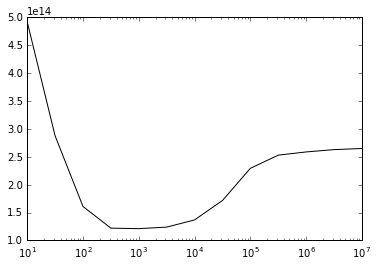

In [101]:
%matplotlib inline
plt.plot(l2_vals,cv,'k-')
plt.xscale('log')

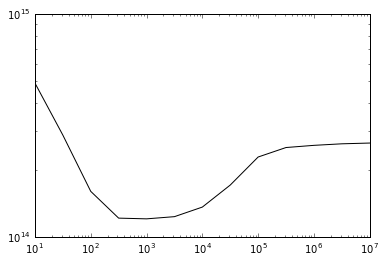

In [102]:
%matplotlib inline
plt.plot(l2_vals,cv,'k-')
plt.xscale('log')
plt.yscale('log')

In [103]:
print min(cv)

1.21192264451e+14


In [151]:
l2=1.00000000e+03
a = polynomial_sframe(train_valid_shuffled['sqft_living'],15)
a['price'] = train_valid['price']
final_model = graphlab.linear_regression.create(a, target ='price' , features=features_list , l2_penalty=1000,
                                               validation_set = None,verbose=False)

In [152]:
yp = final_model.predict(test)

In [153]:
rss = ( test['price'] - yp )**2

In [154]:
rss.sum()

252897427447157.5

In [146]:
x = final_model.coefficients
x

name,index,value,stderr
(intercept),None,253972.377679,367964.818666
power1,None,57.3754544277,1575.15508081
power2,None,0.023783252166,2.78118571579
power3,None,2.64303484986e-06,0.00267861894239
power4,None,6.53250411225e-11,1.57960203978e-06
power5,None,-1.0280259983e-15,6.17663945223e-10
power6,None,-1.17062658026e-19,1.77102643952e-13
power7,None,-5.32286483343e-24,4.16681311222e-17
power8,None,-2.90413735131e-28,7.94019275178e-21
power9,None,-2.90869143388e-32,1.07760627173e-24


In [142]:
(x['value']*x['value']).sum()

64501971915.648865

In [144]:
252897427447157.5 + 64501971915.648865*1000

317399399362806.4